In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as db
import matplotlib.pyplot as plt
from datetime import date, timedelta
from pandas import  Series
from nsepy import get_history
%matplotlib inline

In [2]:
tcs = get_history(symbol= 'TCS',start=date(2015,1,1),end=date(2015,12,31),index=False)

In [3]:
infy = get_history(symbol= 'INFY',start=date(2015,1,1),end=date(2015,12,31),index=False)

In [4]:
nifty = get_history(symbol= 'NIFTY',start=date(2015,1,1),end=date(2015,12,31),index=True)

In [7]:
tcs['Ticks'] = range(0,len(tcs.index.values))
infy['Ticks'] = range(0,len(infy.index.values))
nifty['Ticks'] = range(0,len(nifty.index.values))

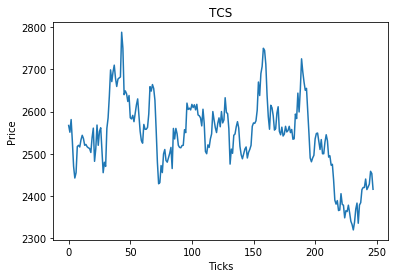

In [9]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('TCS')
ax1.plot('Ticks', 'Open', data = tcs);

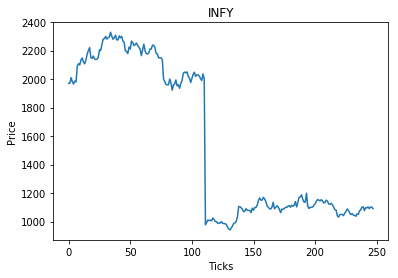

In [10]:
fig = plt.figure(2)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('INFY')
ax1.plot('Ticks', 'Open', data = infy);

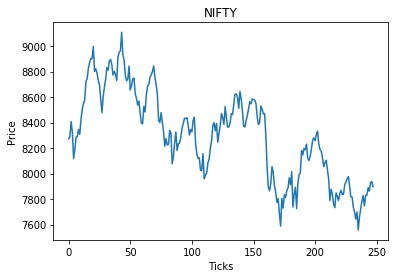

In [11]:
fig = plt.figure(3)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('NIFTY')
ax1.plot('Ticks', 'Open', data = nifty);

In [12]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE

In [13]:
# assuming window = 70 for rolling 
#Case - no unequal time series
tcs['Rolling Mean'] = tcs['Open'].rolling(window = 70).mean()
infy['Rolling Mean'] = infy['Open'].rolling(window = 70).mean()
nifty['Rolling Mean'] = nifty['Open'].rolling(window = 70).mean()

In [14]:
#Unequal time series
def start(close,time=1): #time in weeks
    day = 7*time
    i=0
    j=0
    for i in range(len(close)):
        j = (close.index[i]-close.index[0]).days+1
        if j>day:
            break
    return i-1
# start computes difference in index b/w two dates

In [15]:
# Lasso regularization
def Lass(data1,data2,horizon):
    model = Lasso(alpha = 0.1).fit(data1,data2)
    pred = model.predict(data1)
    return pred[-horizon]


In [16]:
# MSE on single rolling mean window
def RM_single(data1, data2,window,horizon):
    k=0
    sq_error = np.zeros((1,horizon))
    for k in range(horizon):
        values = data2[-k] 
        pred = Lass(data1,data2,k)
        
        sq_error[1,k] = MSE(y_true = values,
                            y_pred = pred,
                            sample_weight=None,
                            multioutput='raw_values')
        
    return sq_error


In [17]:
def RM(data1,data2, window,horizon):#data 1= ticks, data2 = rolling mean
    num = len(data1)-window+1
    i=0
    sq_net = np.zeros((1,horizon))
    j = window
    
    print('j =',j)
    for i in range(j,num):
        st = start(data1[i:i+window],time = window)
        sql = np.array(RM_single(data1[i:i+st].reshape(-1,1), data2[i:i+st].reshape(-1,1),window,horizon))
        print('i= ',i,'sql =',sql)
        sq_net = np.sum(sq_net,sql,axis =0)
        print('sq_net = ',sq_net)
    
    j = np.argmin(sq_net)
    print("The",j,'-step forecast is best: ', sq_net)

In [18]:
RM(tcs['Ticks'],tcs['Rolling Mean'],70,7)

j = 70


AttributeError: 'Series' object has no attribute 'reshape'